# Bike Plotter

The purpose of this application is to allow the user to investigate how a bicycle design looks and handles using the Patterson Control Model. This interface allows you to specify each of the bicycle component's values as shown below, as well as list multiple riders to test the bike with. Finally, the user can input a target handling curve, which is the curve that they are using as a datum to work towards. All of this is aggregated together when the model is run at the bottom of this form, and two plots are output. The first plot shows the bicycle design with each rider superimposed on it, and the second plot shows the control sensitivity values that were computed for each rider on the bicycle. The resulting output will be saved as an HTML file to the filename you specified.

## Steps to using this bike plotter:
1. Specify the bicycle's component parameters.
2. Specify each rider(s) parameters.
3. Specify the target control sensitivity curve values (1 per km/hr).
4. Run the plotter.

## Specify the Bicycle Config Parameters
The bicycle parameter set is outlined in the figure and table below. Choose a single value for each of these parameters and fill out the bicycle parameters file below.

<img src="https://github.com/ChristopherHunt/colab_test/blob/master/src/notebooks/demos/img/bicycle_params.png?raw=1" alt="Drawing" align=left style="width: 650px;"/>
<img src="https://github.com/ChristopherHunt/colab_test/blob/master/src/notebooks/demos/img/bicycle_params_table.png?raw=1" alt="Drawing" align=left style="width: 300px;"/>

In [0]:
!mkdir temp

In [2]:
%%writefile temp/bike_params.txt

# Bike Parameters
wheelbase           = 0.94      # [m]
hip_angle           = 150       # [degrees]
headtube_angle      = 17        # [degrees]
crank_radius        = 0.175     # [m]
crank_x_offset      = -0.58     # [m]
crank_z_offset      = 0.27      # [m]
fork_offset         = 0.0       # [m]
seat_height         = 1.05      # [m]
handlebar_radius    = 0.2       # [m]
front_wheel_radius  = 0.336     # [m] (700c + tire)
rear_wheel_radius   = 0.336     # [m] (700c + tire)
frame_mass          = 5         # [kg]
crank_mass          = 1         # [kg]
front_wheel_mass    = 2         # [kg]
rear_wheel_mass     = 2         # [kg]

Writing temp/bike_params.txt


## Specify the Rider Config Parameters

The riders configuration file is similar to that of the bicycle configuration file in that each parameter can only have a single value. However, since a bicycle design can fit multiple riders, this configuration file allows you to specify parameters for multiple people (the below file shows 2 riders as an example). As such, each rider is designated by one of the parameter paragraphs shown below. To add a new rider, copy/paste one of the paragraphs and change the new one's values. To remove a rider, just remove a paragraph. Rider's are modeled as simple geometric shapes as shown below.

<img src="https://github.com/ChristopherHunt/colab_test/blob/master/src/notebooks/demos/img/rider_params.png?raw=1" alt="Drawing" align=left style="width: 550px;"/>
<img src="https://github.com/ChristopherHunt/colab_test/blob/master/src/notebooks/demos/img/rider_params_table.png?raw=1" alt="Drawing" align=left style="width: 350px;"/>

In [3]:
%%writefile temp/rider_params.txt

# Rider Parameters for Chris
rider_name    = Chris
rider_mass    = 60      # [kg]
head_diameter = 0.185   # [m]
torso_length  = 0.48    # [m]
torso_depth   = 0.15    # [m]
torso_width   = 0.2     # [m]
arm_length    = 0.5     # [m]
arm_diameter  = 0.08    # [m]
leg_length    = 1.0     # [m]
leg_diameter  = 0.12    # [m]

Writing temp/rider_params.txt


## Specify the Target Control Sensitivity Curve

This section specify the control sensitivity curve values that are to be used a the datum to comparse each of the above rider's computed sensitivity curves against. This file is expected to have a single decimal value per line, with that value representing the bicycle's control sensitivity value at speeds that are incrementing by 1 km/hr. Additionally, comments are allowed as their own line and inline. See the below file as an example.

In [4]:
%%writefile temp/target_control_curve.txt

# Each of these sensitiity values are taken at 1 km/hr increments.
0.0
4.91182755576263
8.689145503596954
10.929933350579264
11.887061701213392
12.012116549642014
11.67965536598488
11.130500341252748
10.501269558427989
9.863617909950662
9.252432135983431
8.682809506262718
8.159565498236862
7.6823824773101
7.248546962871624
6.854381950353588
6.495979403303164
6.169559316634012
5.871630869728979
5.599050134826332
5.349025224945828
5.1190962285110695
4.907104502464843
4.711158937302023
4.529603016790712
4.360984441054753
4.204027984059518
4.057611686525297
3.920746205411979
3.7925570191856104
3.6722691503374123
3.559194071995839
3.452718491234011
3.352294735462771
3.257432503580337
3.1676917770584287
3.082676716427125
3.0020303952017136

Writing temp/target_control_curve.txt


## Load the appropriate modules
*This is just so we can run the model*

In [5]:
!git clone https://github.com/ChristopherHunt/bikes.git

Cloning into 'bikes'...
remote: Enumerating objects: 56, done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 56
Unpacking objects: 100% (56/56), done.


In [0]:
import os
import sys
module_path = os.path.abspath(os.path.join('bikes/src/python3'))
if module_path not in sys.path:
    sys.path.append(module_path)

%load_ext bike
%load_ext config_parser
%load_ext single_bike_gen

## Run the Simulation

Chris's Control Sensitivity:
[0.0, 1.5526760495699754, 2.9351935911483307, 4.0343516230564855, 4.815025340301945, 5.3036721326692104, 5.55738580024602, 5.638628056334461, 5.601769014211681, 5.488825697037297, 5.330033458784544, 5.146155949059945, 4.950973127002052, 4.753364036297865, 4.55887124500044, 4.370811303876877, 4.191038175473325, 4.0204583081707845, 3.8593741611332275, 3.707711549056966, 3.5651691631803692, 3.431316271507576, 3.305656023560219, 3.187665970131695, 3.076823516384817, 2.972621437463729, 2.8745768672217333, 2.7822360297924145, 2.6951762252108193, 2.6130060748696833, 2.53536469501213, 2.4619202404843126, 2.392368109447111, 2.326428998058645, 2.26384692591972, 2.2043873073947973, 2.1478351134576, 2.0939931485349885]

Rider data:
{'rider_name': 'Chris', 'rider_mass': 60.0, 'head_diameter': 0.185, 'torso_length': 0.48, 'torso_depth': 0.15, 'torso_width': 0.2, 'arm_length': 0.5, 'arm_diameter': 0.08, 'leg_length': 1.0, 'leg_diameter': 0.12}


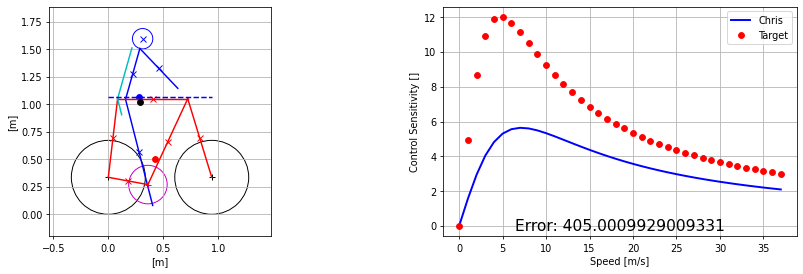

In [7]:
%run -i bikes/src/python3/single_bike_gen temp/target_control_curve.txt temp/bike_params.txt temp/rider_params.txt